In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('SpotifyFeatures.csv')

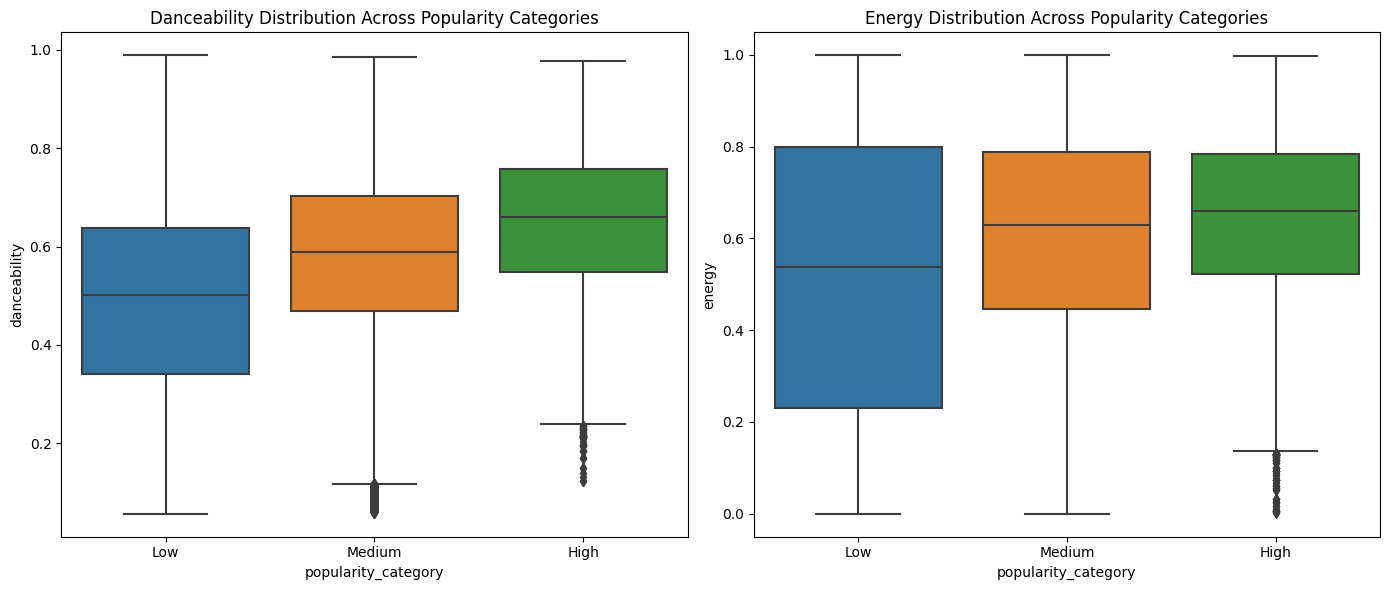

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#popularity categories
data['popularity_category'] = pd.cut(data['popularity'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='popularity_category', y='danceability', data=data)
plt.title('Danceability Distribution Across Popularity Categories')


plt.subplot(1, 2, 2)
sns.boxplot(x='popularity_category', y='energy', data=data)
plt.title('Energy Distribution Across Popularity Categories')

plt.tight_layout()
plt.show()

/tmp/ipykernel_37/1143305198.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_averages = data.groupby('genre')['danceability', 'energy'].mean()


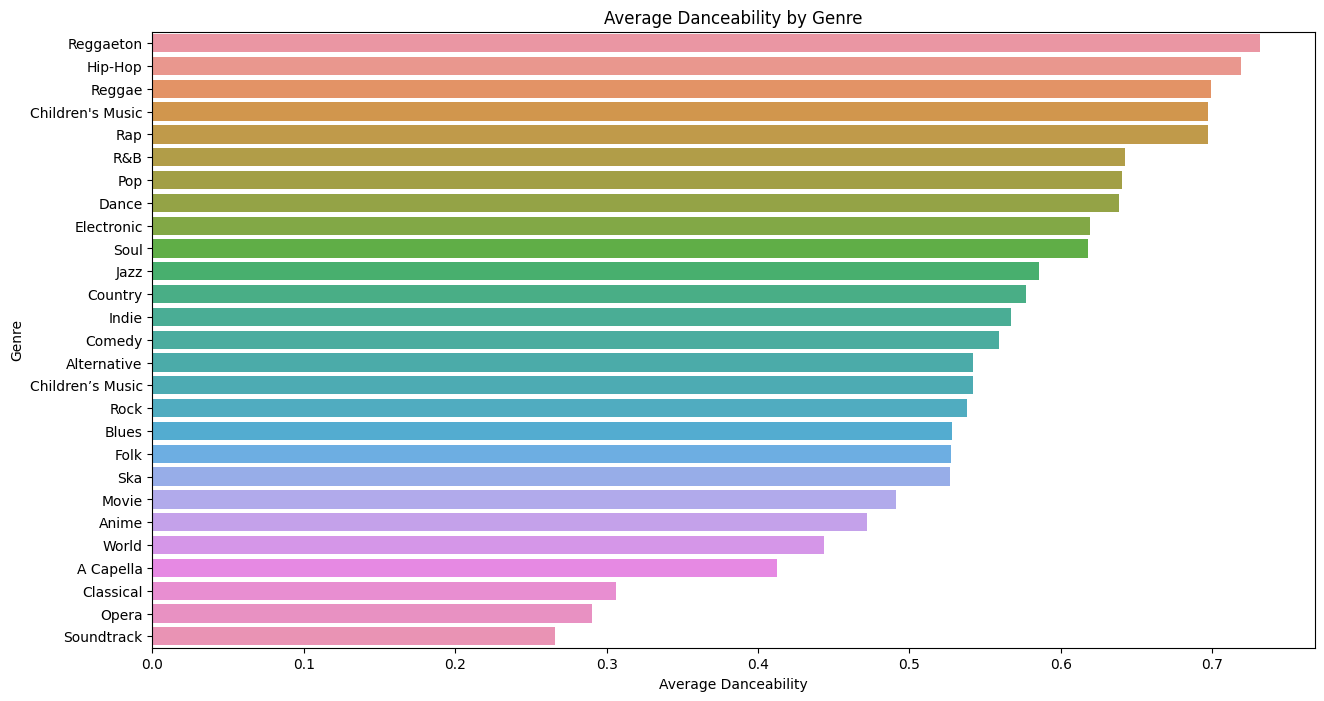

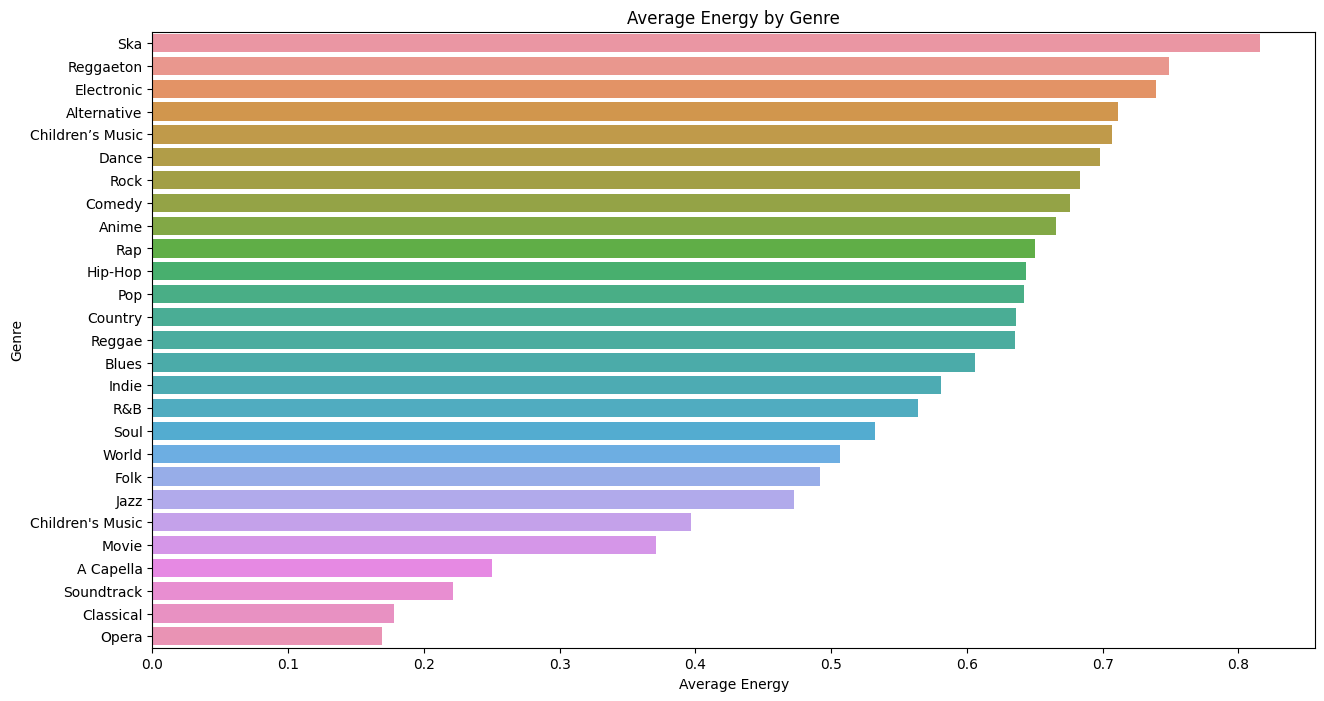

In [ ]:
genre_averages = data.groupby('genre')['danceability', 'energy'].mean()


sorted_by_danceability = genre_averages.sort_values('danceability', ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x=sorted_by_danceability['danceability'], y=sorted_by_danceability.index)
plt.title('Average Danceability by Genre')
plt.xlabel('Average Danceability')
plt.ylabel('Genre')
plt.show()


sorted_by_energy = genre_averages.sort_values('energy', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=sorted_by_energy['energy'], y=sorted_by_energy.index)
plt.title('Average Energy by Genre')
plt.xlabel('Average Energy')
plt.ylabel('Genre')
plt.show()

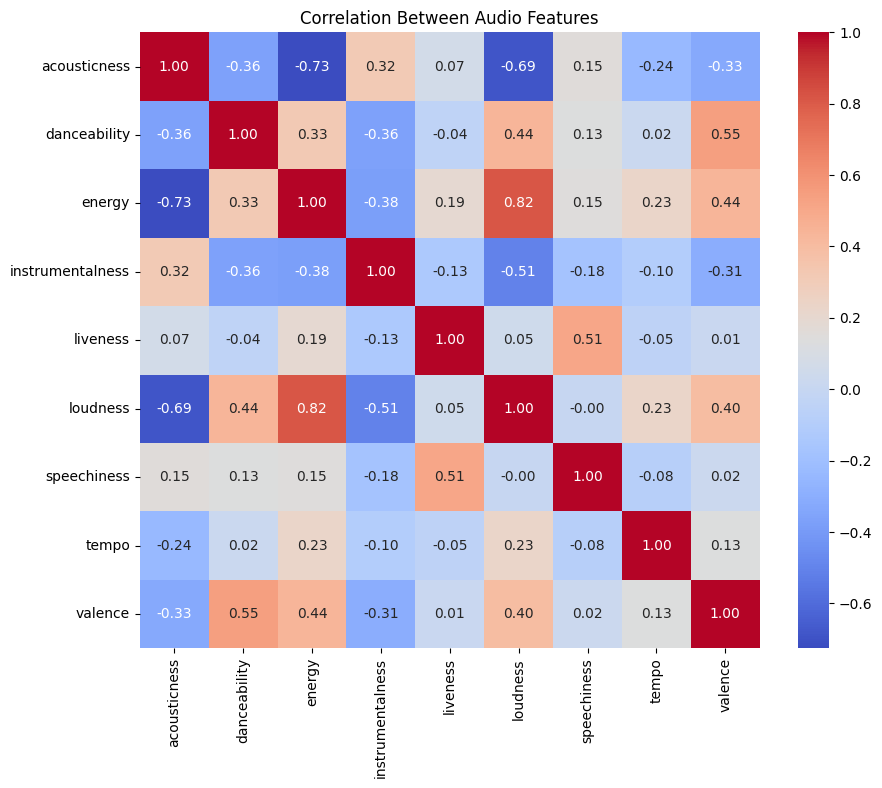

In [ ]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


corr_matrix_audio_features = data[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_audio_features, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Audio Features")
plt.show()

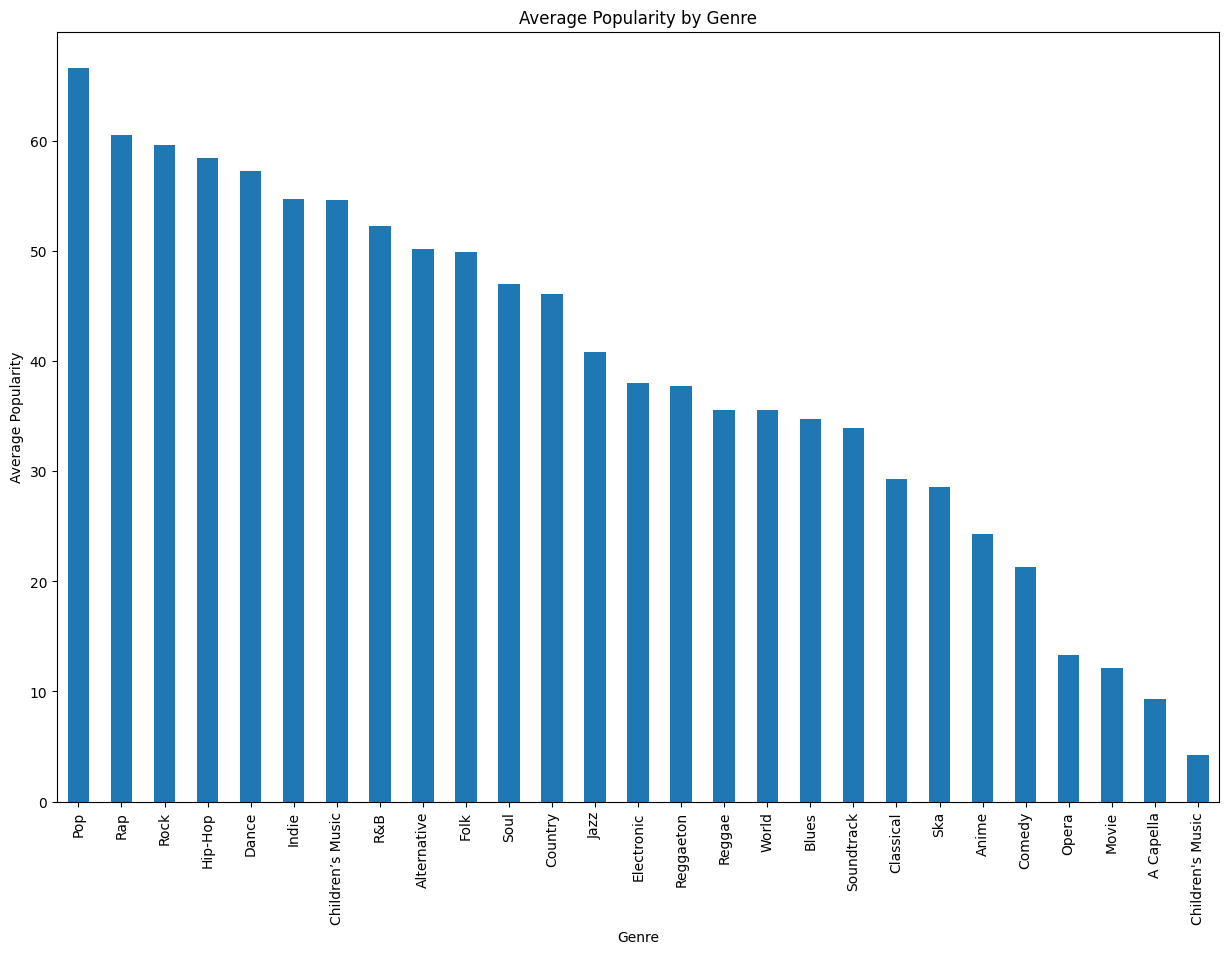

In [ ]:
genre_popularity = data.groupby('genre')['popularity'].mean().sort_values(ascending=False)


plt.figure(figsize=(15, 10))
genre_popularity.plot(kind='bar')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)  # Rotates the genre labels for better readability
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('SpotifyFeatures.csv')
y = df['popularity']
X = df.drop(columns=['popularity', 'track_name', 'track_id'], axis=1)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_MAE = mean_absolute_error(y_test, linear_pred)
linear_MAE

12.656280032069361

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=12)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE = mean_absolute_error(y_test, tree_pred)
tree_MAE

7.143731481315442

In [ ]:
forest_model = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=21)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_MAE = mean_absolute_error(y_test, forest_pred)
forest_MAE

11.068088057107746

In [ ]:
# Gradient Boosting Machine Model
gbm_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
gbm_MAE = mean_absolute_error(y_test, gbm_pred)
gbm_MAE

7.642914092133488

In [ ]:
#Not running
'''

# Neural Network Model
neural_model = Sequential()
neural_model.add(Dense(8, input_dim=len(X.columns), activation='relu'))
neural_model.add(Dense(6, activation='relu'))
neural_model.add(Dense(1, activation='linear'))
neural_model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mae'])
neural_model.fit(X_train, y_train, epochs=6, batch_size=5, verbose=0)
neural_pred = neural_model.predict(X_test)
neural_MAE = mean_absolute_error(y_test, neural_pred)
neural_MAE

'''

"\n\n# Neural Network Model\nneural_model = Sequential()\nneural_model.add(Dense(8, input_dim=len(X.columns), activation='relu'))\nneural_model.add(Dense(6, activation='relu'))\nneural_model.add(Dense(1, activation='linear'))\nneural_model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mae'])\nneural_model.fit(X_train, y_train, epochs=6, batch_size=5, verbose=0)\nneural_pred = neural_model.predict(X_test)\nneural_MAE = mean_absolute_error(y_test, neural_pred)\nneural_MAE\n\n"

In [ ]:
print('Linear Regression MAE:', linear_MAE)
print('Decision Tree MAE:', tree_MAE)
print('Random Forest MAE:', forest_MAE)
print('GBM MAE:', gbm_MAE)
#print('Neural Network MAE:', neural_MAE)

Linear Regression MAE: 12.656280032069361
Decision Tree MAE: 7.137629972529525
Random Forest MAE: 11.068088057107746
GBM MAE: 7.642914092133488


In [ ]:
#trying something new
df = pd.read_csv('SpotifyFeatures.csv')
#deviation from the genre average
for feature in ['danceability', 'energy']:
    df[feature + '_Deviation_From_Genre_Avg'] = df[feature] - df.groupby('genre')[feature].transform('mean')

# nteraction danceability and energy
df['Danceability_Energy_Interaction'] = df['danceability'] * df['energy']

# one-hot genres
df = pd.concat([df, pd.get_dummies(df['genre'], prefix='genre')], axis=1)
df.drop('genre', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['popularity', 'track_name', 'track_id'], axis=1)
y = df['popularity']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
preds = linear_reg.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, preds)
print('Linear Regression MAE:', linear_MAE)
print('New Linear Regression MAE:', linear_reg_mae)

Linear Regression MAE: 12.656280032069361
New Linear Regression MAE: 12.73659444163419


In [ ]:

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
preds = tree_reg.predict(X_test)
tree_reg_mae = mean_absolute_error(y_test, preds)
print('Decision Tree MAE:', tree_MAE)
print('New Decision Tree MAE:', tree_reg_mae)

Decision Tree MAE: 7.143731481315442
New Decision Tree MAE: 9.44692629407889


In [ ]:
#Not running 

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
preds = rf_reg.predict(X_test)
rf_reg_mae = mean_absolute_error(y_test, preds)
print('Random Forest MAE:', forest_MAE)
print('New Random Forest MAE:', rf_reg_mae)


Random Forest MAE: 11.068088057107746
New Random Forest MAE: 6.753365986940194


In [ ]:
#Visualizing different max_depths 


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('SpotifyFeatures.csv')
y = df['popularity']
X = df.drop(columns=['popularity', 'track_name', 'track_id'], axis=1)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




2023-12-04 23:22:30.615050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 23:22:30.726174: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 23:22:30.730709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-04 23:22:30.730725: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_three = mean_absolute_error(y_test, tree_pred)
tree_MAE_three

11.160504084502954

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_five = mean_absolute_error(y_test, tree_pred)
tree_MAE_five

8.609690364097153

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=7)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_seven = mean_absolute_error(y_test, tree_pred)
tree_MAE_seven

7.905663416498171

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=9)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_nine = mean_absolute_error(y_test, tree_pred)
tree_MAE_nine

7.498491786459216

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=12)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_twelve = mean_absolute_error(y_test, tree_pred)
tree_MAE_twelve

7.139750123505702

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=14)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_MAE_fourteen = mean_absolute_error(y_test, tree_pred)
tree_MAE_fourteen

7.227465975496371

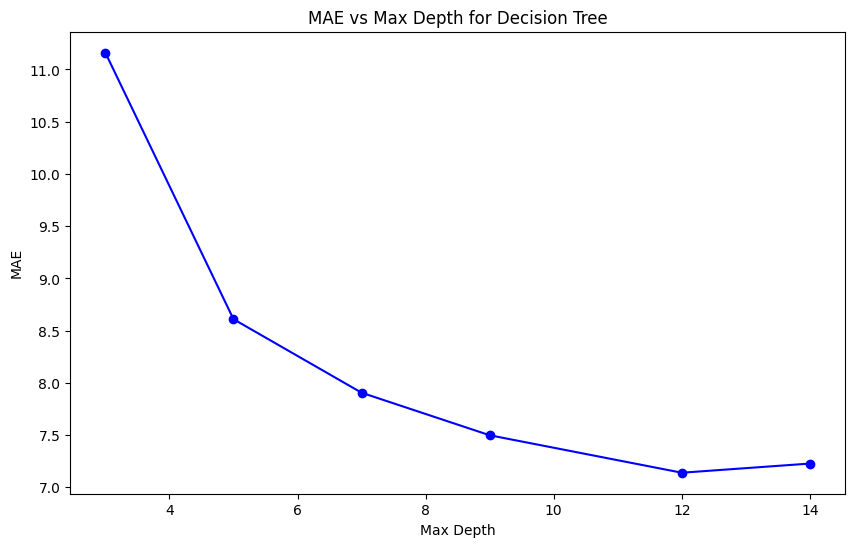

In [ ]:
import matplotlib.pyplot as plt

max_depth_values = [3, 5, 7, 9, 12, 14]  # Different values of max_depth
mae_values = [tree_MAE_three, tree_MAE_five, tree_MAE_seven, tree_MAE_nine, tree_MAE_twelve, tree_MAE_fourteen]  # Corresponding MAE values

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mae_values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('MAE vs Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('MAE')

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32c8605a-2690-4522-b750-f2baac252073' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>